# 크게 다음과 같은 프로세스로 진행됩니다.
## 1. 얼굴인식
## 2. 거리측정
## 3. 닮은 얼굴 추출
## 4. 시각화

# 1. 얼굴인식

## 1-1. 얼굴 영역 추출

[(830, 1575, 1789, 617)]


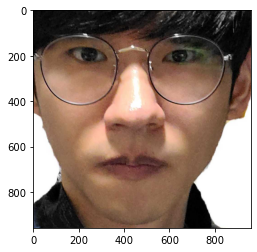

In [1]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/조웅제.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt
type(face_locations)
a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]
plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

## 1-2. 위의 얼굴영역 반환 함수 정의

In [2]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/조웅제.jpg'
#image = face_recognition.load_image_file(image_path)

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    if face_locations != []:
        a, b, c, d = face_locations[0]
        cropped_face = image[a:c,d:b,:]
        return cropped_face#얼굴 인식 성공시 좌표반환
    else:
        return []#얼굴인식 실패시 빈 리스트 반환, 없으면 index out of range오류발생
len(get_gropped_face(image_path))

959

In [3]:
# import face_recognition
# import os

# def get_gropped_face(image_file):
#     image = face_recognition.load_image_file(image_file)
#     face_locations = face_recognition.face_locations(image)
#     a, b, c, d = face_locations[0]
#     cropped_face = image[a:c,d:b,:]
#     return cropped_face

## 1-3. 함수가 제대로 정의되었는지 확인

[[[ 15  15  15]
  [ 16  16  16]
  [ 16  16  16]
  ...
  [ 16  17  12]
  [ 21  22  17]
  [ 26  27  22]]

 [[ 15  15  15]
  [ 16  16  16]
  [ 16  16  16]
  ...
  [ 14  15  10]
  [ 20  21  16]
  [ 25  26  21]]

 [[ 18  18  18]
  [ 17  17  17]
  [ 16  16  16]
  ...
  [ 19  15  16]
  [ 20  16  17]
  [ 21  17  18]]

 ...

 [[ 75  86 116]
  [ 77  88 118]
  [ 74  85 115]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 69  80 110]
  [ 73  84 114]
  [ 73  84 114]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 65  76 106]
  [ 70  81 111]
  [ 71  82 112]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


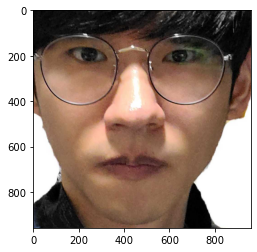

In [4]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/조웅제.jpg'

cropped_face = get_gropped_face(image_path)
print(cropped_face)
plt.imshow(cropped_face)

## 1-4. 디렉토리 안의 모든 이미지 추출

In [5]:
dir_path = os.getenv("HOME") + '/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)#해당 디렉터리에 있는 파일과 디렉토리들의 리스트를 구함
#print(file_list)

# 2. 거리측정

## 2-1. 얼굴의 임베딩을 구하는 함수 정의(face_encodings 메서드 사용)

In [6]:
# image_file = os.path.join(dir_path, '조웅제.jpg')#두 경로를 결합
# face = get_gropped_face(image_file)

def get_face_embedding(face): 
    return face_recognition.face_encodings(face)#임베딩 벡터를 구함
#embedding = get_face_embedding(face)
#embedding

In [7]:
# #1. 얼굴 영역을 가져와야 함
# #2. 디렉토리를 가져와야 함
# #3. 모든 이미지 파일의 임베딩을 딕셔너리 형태로 담아야 함. return
# #   될거같은데 왜 안되지?
# dir_path = os.getenv("HOME") + '/aiffel/face_embedding/images'
# #image_file = os.path.join(dir_path, '조웅제3.jpg')#두 경로를 결합
# face = get_gropped_face(image_file)

    
# def get_face_embedding_dict(dir_path):
#     list_images = os.listdir(dir_path)
#     embedding_dict = {}
#     for image in list_images:
#         image_path = os.path.join(dir_path, image)
#         face = get_gropped_face(image_path)
#         if len(face) > 0:
#             #이 아래부분 다시한번 볼것!! 왜 [0]으로 인덱싱하는건지?
#             embedding_dict[os.path.splitext(image)[0]] = get_face_embedding(face)[0]
#         else :
#             continue
#     return embedding_dict
# #print(list_images)
# #print(face)
# #print(embedding_dict)
# embedding_dict = get_face_embedding_dict(dir_path)
# embedding_dict['조웅제2'] # obama.jpg의 얼굴임베딩 벡터

## 2-2. 이미지를 모두 불러와서 얼굴영역만 딕셔너리 형태로 저장하는 저장하는 함수 생성

In [8]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        print(file)#이미지 확인용 출력
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        if face == []:continue#예외처리, 얼굴인식 실패시 빈 리스트 반환 확인, continue
        else:
            embedding = get_face_embedding(face)
            if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
                    embedding_dict[os.path.splitext(file)[0]] = embedding[0]#각 리스트 의 위치가 무엇을 의미하는지 궁금

    return embedding_dict

In [9]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['조웅제'] # 대상의 얼굴임베딩 벡터

수호.jpg
제프리 힌턴.jpg

/home/aiffel-dj62/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':



김고은.jpg
마동석.jpg
이연걸.jpg
피어스 브로스넌.jpg
공효진.jpg
레오나르도 디카프리오.jpg
방시혁.jpg
이대형.jpg
문재인.jpg
권현빈.jpg
이천수.jpg
최준석.jpg
안재홍.jpg
BI.jpg
조이.jpg
공유.jpg
진.jpg
슬기.jpg
레드벨벳웬디.jpg
성시경.jpg
황정민.jpg
조성제1.jpg
이종석.jpg
정민철.jpg
봉준호.jpg
레인보우재경.jpg
곽도원.jpg
김다미1.jpg.crdownload
b1a4진영.jpg
심수창.jpg
철면수심.jpg
스윙스.jpg
켄 정.jpg
조정석.jpg
한석규.jpg
이도현.jpg
장동건.jpg
최무성.jpg
비니.jpg
매드클라운.jpg
김연우.jpg
태양.jpg
김구라.jpg
노무현.jpg
꽈두룹.jpg
박희순.jpg
수지.jpg
나인뮤지스경리.jpg
러블리즈예인.jpg
한효주.jpg
지민(BTS).jpg
슈가.jpg
차두리.jpg
이승철.jpg
최자.jpg
온앤오프와이엇.jpg
트와이스나연.jpg
솔라.jpg
박서준.jpg
조달환.jpg
온앤오프효진.jpg
제이크 질렌할.jpg
bush.jpg
이승기.jpg
윤아.jpg
전소미.jpg
이제훈.jpg
세훈.jpg
로제.jpg
김학범.jpg
차승원.jpg
이광수.jpg
박나래.jpg
박소담1.jpg
손흥민.jpg
미미.jpg
박정민.jpg
러블리즈 지수1.jpg
벤 에플렉.jpg
이준혁.jpg
클린트 이스트우드.jpg
조성제.jpg
채연.jpg
잇지예지.jpg
장성호.jpg
유해진.jpg
박찬욱.jpg
김희철.jpg
성룡.jpg
신태용.jpg
류승룡.jpg
김영삼.jpg
비2.jpg
티파니.jpg
김현수.jpg
첸.jpg
안소희2.jpg
조승우.jpg
제이콥 배털론.jpg
하승진.jpg
아놀드 슈워제네거.jpg
장도연.jpg
박찬호.jpg
이도현2.jpg
노홍철.jpg
비.jpg
강하늘.jpg
아이즈원조유리.jpg
잭 스페이더.jpg
이안 굿펠로우.jpg
크리스 에반스.jpg
이도현1.jpg
최양락.jpg
찬열.jpg
황병국.

array([-0.08933164,  0.13619791, -0.00588441, -0.048556  , -0.09672119,
       -0.01901639, -0.0837909 , -0.1337321 ,  0.11189654, -0.04476898,
        0.21249565, -0.0513934 , -0.22941826, -0.05850709, -0.06338125,
        0.14647116, -0.14241432, -0.09722727, -0.09101735,  0.0260706 ,
        0.07250627,  0.02780658,  0.09838413,  0.06459572, -0.02098568,
       -0.35440105, -0.08529454, -0.1222636 ,  0.02224047, -0.05043055,
       -0.02744818, -0.00469012, -0.1625419 , -0.05645976,  0.02374554,
        0.00772142, -0.03127919, -0.06102163,  0.2616381 , -0.02669045,
       -0.24052736,  0.04397095,  0.04540609,  0.23230262,  0.20004939,
        0.01399217,  0.05365543, -0.17501807,  0.12769291, -0.10654472,
        0.07376209,  0.14623217,  0.1213051 ,  0.01304823, -0.03067102,
       -0.11566222,  0.02423048,  0.1294996 , -0.17013256,  0.01542842,
        0.14169624, -0.04418346, -0.07037897, -0.07801313,  0.20519392,
        0.05806307, -0.11975457, -0.19724265,  0.10638461, -0.12

## 2-3. 좌표 사이의 거리를 구하기 위해 array로 바꿔준 뒤 거리를 구하는 함수 정의

In [11]:
import numpy as np
#계산을 위해 list에서 np.array로 변환
#np.linalg.norm를 활용하여 L2 Norm Distance로 계산
#distance = np.linalg.norm([A, B] - C, axis = 1, ord = 2)

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord = 2)

In [23]:
get_distance('조웅제', '조웅제3')

0.432101263785847

## 2-4. 두 이미지의 거리를 계산해서 정렬 

In [24]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('조웅제')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [25]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('조웅제',
  array([-0.08933164,  0.13619791, -0.00588441, -0.048556  , -0.09672119,
         -0.01901639, -0.0837909 , -0.1337321 ,  0.11189654, -0.04476898,
          0.21249565, -0.0513934 , -0.22941826, -0.05850709, -0.06338125,
          0.14647116, -0.14241432, -0.09722727, -0.09101735,  0.0260706 ,
          0.07250627,  0.02780658,  0.09838413,  0.06459572, -0.02098568,
         -0.35440105, -0.08529454, -0.1222636 ,  0.02224047, -0.05043055,
         -0.02744818, -0.00469012, -0.1625419 , -0.05645976,  0.02374554,
          0.00772142, -0.03127919, -0.06102163,  0.2616381 , -0.02669045,
         -0.24052736,  0.04397095,  0.04540609,  0.23230262,  0.20004939,
          0.01399217,  0.05365543, -0.17501807,  0.12769291, -0.10654472,
          0.07376209,  0.14623217,  0.1213051 ,  0.01304823, -0.03067102,
         -0.11566222,  0.02423048,  0.1294996 , -0.17013256,  0.01542842,
          0.14169624, -0.04418346, -0.07037897, -0.07801313,  0.20519392,
          0.05806307, -0.1197

In [26]:
#얼굴을 가져온다
#얼굴을 비교해서 결과값을 얻는다
#숫자들을 비교한다
#정렬한다
#입력받은 임의의 이름에 대해 다른 이미지의 임베딩 거리를 정렬해서 적절히 출력한다

# 닮은 얼굴 추출

## 3-1. 거리가 가장 가까운 얼굴부터 top10 추출해주는 함수

In [27]:
result = []
def get_nearest_face(name, top=10):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            result.append(sorted_faces[i][0])
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [28]:
get_nearest_face('조웅제')

순위 1 : 이름(조웅제3), 거리(0.432101263785847)
순위 2 : 이름(안소희1), 거리(0.4567502911885901)
순위 3 : 이름(온앤오프효진), 거리(0.4641931710088023)
순위 4 : 이름(최자), 거리(0.4713567013331064)
순위 5 : 이름(안재홍), 거리(0.4897812360796134)
순위 6 : 이름(이용진), 거리(0.49044910801917047)
순위 7 : 이름(안소희), 거리(0.49201816921013464)
순위 8 : 이름(BI), 거리(0.49528147429831465)
순위 9 : 이름(최현석), 거리(0.49883120936629766)
순위 10 : 이름(성시경), 거리(0.5038299889990707)


In [29]:
print(result)

['조웅제3', '안소희1', '온앤오프효진', '최자', '안재홍', '이용진', '안소희', 'BI', '최현석', '성시경']


# 루브릭


### 1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.
 * 닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었습니다. 가장 닮은 인원을 임베딩 벡터를 이용하여 계산한 후 정렬하여 추출했습니다. 

### 2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.
 * 다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈습니다. 쌍커플이 없는데 쌍커플이 있는 사람이 추출되었다든지, 사람이 보기엔 닮지 않았다고 생각하는 얼굴도 컴퓨터는 이렇게 인식하는구나 싶었습니다.
 
### 3. 다양하고 재미있는 결과 시각화를 시도하였다.
 * matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였습니다. 일반적으로 닮은꼴 어플에서 볼수 있을만한 이미지 변화를 구현해 봤습니다.

# 4. 시각화

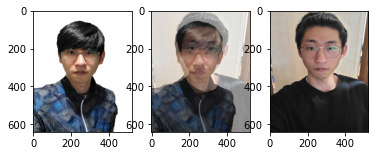

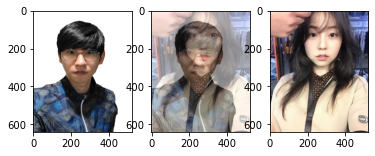

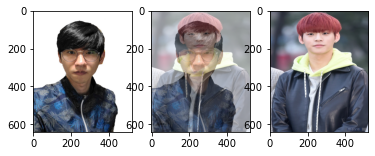

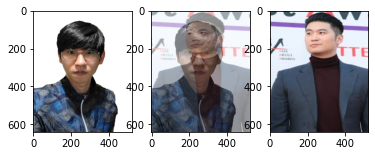

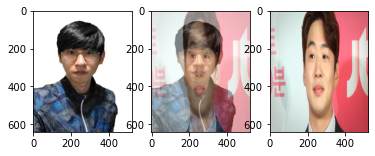

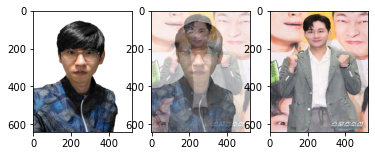

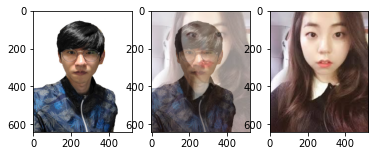

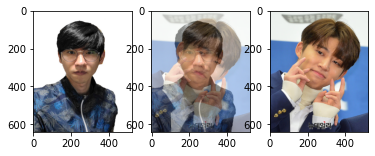

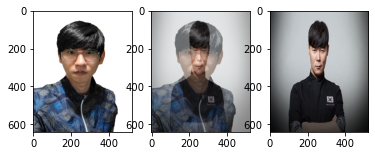

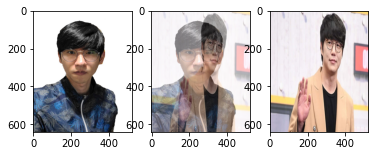

In [30]:
import cv2
import numpy as np
for i in result[0:10]:
    #이미지 불러오기(원본이미지, 닮은 이미지), 크기조정, 겹치기
    img1 = cv2.imread(os.getenv('HOME')+'/aiffel/face_embedding/images/조웅제.jpg')
    img1 = cv2.resize(img1, (520, 640))
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.imread(os.getenv('HOME')+'/aiffel/face_embedding/images/{}.jpg'.format(i))
    img2 = cv2.resize(img2, (520, 640))
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    dst = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)
    
    #스케치북 그리기
    fig = plt.figure() # rows*cols 행렬의 i번째 subplot 생성
    rows = 1
    cols = 3
    
    #스케치북에 사진 넣기
    ax1 = fig.add_subplot(rows, cols, 1)
    ax2 = fig.add_subplot(rows, cols, 2)
    ax3 = fig.add_subplot(rows, cols, 3)
    ax1.imshow(img1)
    ax2.imshow(dst)
    ax3.imshow(img2)
    plt.show()



# 회고
 이번 노드는 우리가 많이 접해봤던 닮은꼴을 찾아주는 기능을 구현해보는 시간이었습니다. 구현을 하면서 정말 재밌었고 모르는 부분도 있었지만 코드도 해석해보려고 노력했습니다. face_recognition의 성능이 얼굴을 인식하는 부분에선 다소 실망스러웠지만 생각보다 닮은 꼴을 찾아내는구나 싶기도 했습니다(심지어 가족의 얼굴도 찾아내는걸 확인했습니다!).



이미 구현한 함수들을 재구성해보는 정도였지만 이번 노드에서 어려웠던 부분은 크게 네 부분이 있었습니다. 
 * 1. dlib의 face_recognition이 제 얼굴을 인식하지 못했습니다. 한두장이면 그럴수도 있지 싶었겠지만 10장중에 3장을 인식할까 정도였습니다. 아무리 서양인의 이목구비로 학습된 라이브러리라지만 이건 좀 너무한거 아닌가..싶었습니다.(이목구비의 문제인가..ㅠ) 그래서 태어나서 제 얼굴을 이정도로 여러번 찍어본게 처음일 정도로 찍어서 확인하고 지우고 작업을 반복했습니다. 배경을 최대한 지워보라는 팀원의 의견을 듣고 최종 사진은 배경까지 제거했습니다.
 * 2. 얼굴을 인식하지 못하는 사진으로 인한 index out of range에러와 이를 해결하기 위한 조건문을 여기저기 삽입하는 과정이 시간이 꽤나 걸렸습니다. get_face_embedding_dict() 부분에서 예외처리를 해주면 될것이라고 생각했지만 해결되지 않았고, get_gropped_face()함수까지 손보고 나서야 제대로 파일을 읽어오는 것을 확인할 수 있었습니다.
 * 3. 시각화 부분이었습니다. 이 노드를 보자마자 가장 먼저 떠오른 것이 이런 방식이었기 때문에 구현해보고자 마음먹었으나, 파이썬을 다루는 능력이 부족해 좀 헤맸습니다. 그래도 이전 노드에서 고양이 수염을 붙였을때의 방법에서 착안하여 구현을 성공하였습니다. 다만 아쉬운점은 사진의 비율과 각도등이 달라서 겹쳤을 때 이질감이 느껴지는 사진들이 있었습니다. 해당 부분을 고양이 수염 노드에서 했던 좌표를 사용하여 코를 기준으로 이미지를 합성해 해결해보고자 하였으나 구현은 하지 못했습니다.
 * 4. get_sort_key_func함수의 작동 원리는 사실 아직도 잘 모르겠습니다. 해석을 하기가 힘드네요 ㅠ
 
# 다짐
 이번 노드를 진행하며 공부하는게 언젠가 쓸모가 있겠구나 하는 생각이 어렴풋이 들었습니다. 파이썬을 좀 더 능숙하게 다룰 수 있다면 더욱 많은것을 구현할 수 있겠다는 생각이 들면서도 아직 많이 부족하다는 생각이 드는 노드였습니다. 더 열심히 해볼게요!!